In [1]:
import pandas as pd
from sqlalchemy import create_engine
import pymysql
import os
from datetime import datetime
import math
import numpy as np

In [2]:
connect_info = 'mysql+pymysql://{}:{}@{}:{}/{}?charset=utf8'.format('root','benbilly3@','localhost',3306,'innoproHistory')  #1
engine = create_engine(connect_info)

connect_info2 = 'mysql+pymysql://{}:{}@{}:{}/{}?charset=utf8'.format('root','benbilly3@','localhost',3306,'InnoproCM') 
engine2 = create_engine(connect_info2)

# 201805後結算資料

In [431]:
df=pd.read_sql('select ordersn,fbid,fbname,shipname,amount,lastcode,city,invoicetitle from orders',con=engine)
df['ordersn']=df['ordersn'].apply(lambda s:s[1:5])
df['lastcode']=df['lastcode'].astype(str).apply(lambda s:s.replace('None','0')).fillna(0)
df=df.sort_values('ordersn')
df=df.set_index(['ordersn'])
df=df[df['lastcode']!='0']
df
# df[df['fbname']=='Ruskin Chen']

/anaconda3/lib/python3.6/site-packages/pymysql/cursors.py:170: Warning:

(3719, "'utf8' is currently an alias for the character set UTF8MB3, but will be an alias for UTF8MB4 in a future release. Please consider using UTF8MB4 in order to be unambiguous.")



,fbid,fbname,shipname,amount,lastcode,city,invoicetitle
ordersn,,,,,,,
1805,100000864950699,Ming-chun Hsieh,謝明君,2085,49400,新北市,
1805,100001215529142,王萬榆,王萬榆,4680,58406,新北市,
1805,1201801634,聶官昱,聶官昱,510,13506,新北市,
1805,100000081128043,Yali Hsueh,YALI HSUEH,510,32388,台北市,
1805,100000036690249,佳佳,鄭佳蓁,4465,20385,台中市,
1805,1204773273,管曉慧,管,6740,38755,台東縣,台東縣立KHH物理文理短期補習班
1805,1447291220,劉盈享,劉盈享,4445,26418,新竹市,
1805,100002075507654,Xin Hsiao,鄭晴,500,鄭晴,台北市,
1805,100005705316095,李孝忠,李孝忠,11410,89694,台南市,


# 201805前結算資料

In [432]:
import re
def select_char(str1):
    try:
        res = re.findall(pattern, str1)
        result=','.join(res).replace(',','')[:3]
    except:
        result=None
    return result

df2=pd.read_sql('select ym,fbid,FBNAME,name,money,chksum1,address,ititle from google',con=engine)
df2['money']=df2['money'].fillna(0)
df2['ym']=df2['ym'].dropna().apply(lambda s:s[2:6])
df2['address']=df2['address'].fillna(0).apply(lambda s: select_char(s))
df2=df2.sort_values('ym')
df2=df2.rename(columns={'ym':'ordersn','FBNAME':'fbname','name':'shipname','money':'amount'
                        ,'chksum1':'lastcode','address':'city','ititle':'invoicetitle'})
df2=df2.set_index(['ordersn'])
df2=df2[df2['amount']!=0]
df2=df2[~df2['lastcode'].isna()]
df2=df2[~df2['fbid'].isna()]
df2
# # df[df['FBNAME']=='Ruskin Chen']

,fbid,fbname,shipname,amount,lastcode,city,invoicetitle
ordersn,,,,,,,
1610,1005168732891648,James Glycine,莊坤祥,8330.0,27955,台南市,
1610,1045351402143014,Deion Chin,秦丞孝,2380.0,84400,桃園市,
1610,867317199970253,WinDow Cheng,程文鐸,26730.0,98611,台北市,
1610,10204835781429805,Vivian Lo,羅智元,3990.0,55200,台北市,
1610,1185582604791524,Monica Wu,吳如惠,550.0,09373,新北市,忠正彩藝印刷事業有限公司
1610,10154031799953876,黃建龍,黃建龍,1390.0,01501,台北市,
1610,858306950933464,Kevin Yen,顏隆安,17020.0,77602,台南市,
1610,10204190382263155,鍾燁官,鍾燁官,4680.0,95246,台北市,
1610,1423366291025599,Trapo Chen,陳詩伯,650.0,38137,高雄市,


# 新舊fbuid轉換

In [495]:
df3=pd.read_sql('select Fbid,oldfbid from members',con=engine).dropna()
df3=df3.set_index(['oldfbid'])
df3=df3[~df3.index.duplicated()]
df3

,Fbid
oldfbid,
1545822708821226,100001805362776
10211084790670096,1665944278
10153403181142162,837957161
900285600064821,100002501697401
10204690340208775,1544277274
10153133856604565,762274564
1220506647969334,100000300300345
10158946182780531,687530530
10204885161663934,1086581048


# 2018前後合併

In [496]:
sheet=pd.concat([df,df2],axis=0)
sheet=sheet.reset_index()
sheet=sheet.set_index('fbid')
sheet['id']=df3.iloc[:,0]
sheet['id']=sheet['id'].fillna(0)
sheet=sheet.reset_index()
sheet['fbid']=[a if b==0 else b for a,b in zip(sheet['fbid'],sheet['id'])]

#處理3碼日期問題
sheet['ordersn']=sheet['ordersn'].apply(lambda s:str(s[:2])+'0'+str(s[-1]) if len(s)<4 else s)
sheet.to_sql(name='settleHistory', con=engine2, if_exists='replace')
sheet

,fbid,ordersn,fbname,shipname,amount,lastcode,city,invoicetitle,id
0,100000864950699,1805,Ming-chun Hsieh,謝明君,2085.0,49400,新北市,,0
1,100001215529142,1805,王萬榆,王萬榆,4680.0,58406,新北市,,0
2,1201801634,1805,聶官昱,聶官昱,510.0,13506,新北市,,0
3,100000081128043,1805,Yali Hsueh,YALI HSUEH,510.0,32388,台北市,,0
4,100000036690249,1805,佳佳,鄭佳蓁,4465.0,20385,台中市,,0
5,1204773273,1805,管曉慧,管,6740.0,38755,台東縣,台東縣立KHH物理文理短期補習班,0
6,1447291220,1805,劉盈享,劉盈享,4445.0,26418,新竹市,,0
7,100002075507654,1805,Xin Hsiao,鄭晴,500.0,鄭晴,台北市,,0
8,100005705316095,1805,李孝忠,李孝忠,11410.0,89694,台南市,,0
9,100000832443324,1805,Chien Fang Cheng,鄭傑方,5540.0,92417,台北市,,0


In [600]:
#加總金額與購買數
amountSum=sheet.groupby(['fbid'])['amount'].sum()
amountCount=sheet.groupby(['fbid'])['amount'].count()

In [584]:
df4=pd.read_sql('select*from members',con=engine,index_col=['FbId'])
df4=df4.drop(columns=['Id','IsAdministrator','album','invoiceid','grade','appuid',
                      'accountname','password','groupname','oldfbid','updated_at'])
df4['sum']=amountSum
df4['buyCount']=amountCount
df4=df4.sort_values('sum',ascending=False)
df4_1=df4.reset_index()
df4_1.to_sql(name='settleCM', con=engine2, if_exists='replace')
df4

,Name,userprofile,helper,email,address,city,county,zipcode,shipname,tel,invoicetitle,sum,buyCount
FbId,,,,,,,,,,,,,
1524387869,李孝偉,https://www.facebook.com/profile.php?id=152438...,陳曉丰,eric0221.tw@yahoo.com.tw,信義路四段173號,台北市,大安區,106,李孝偉,0910152516,,1651107.0,38.0
100002427756153,Jeff Sung,https://www.facebook.com/jeff.sung.98,陳曉丰,jeffsung3118@gmail.com,水源地35-81號,嘉義市,嘉義市,600,宋思權,0988115066,,1627446.0,22.0
100000380702074,Paul Chan,https://www.facebook.com/paul.chan.1048,佩玄,pauljansfo@gmail.com,敦化南路二段77號3樓之4,台北市,大安區,106,詹其哲,0911900019,皇祿投資有限公司,1570657.0,23.0
100000200795140,Jason Lin,https://www.facebook.com/baybimmer,徐筱熙,dad@lucentlin.com,中華路四段451巷159號,新竹市,新竹市,300,林庭正,0975017833,,1399998.0,37.0
100000043841843,Michelle Liu,https://www.facebook.com/michelle.liu.9041,佩玄,m650508@yahoo.com.tw,平等路121-3號9樓,高雄市,三民區,849,劉眉秀,0919389251,,1382918.0,35.0
100000606890690,Jh Wang,https://www.facebook.com/jh.wang.92,佩玄,jhwang26@hotmail.com,北新路三段207-1號15樓,新北市,新店區,231,王建華,0910300920\t,,1375410.0,30.0
100000839834599,Chiu Manthus,https://www.facebook.com/chiu.manthus,佩玄,Ilung1130@gmail.com,衡陽路7號12樓,台北市,中正區,100,邱奕龍,0935548818,茂丞科技股份有限公司\t,1329842.0,27.0
563198546,Shih Chien Wong,https://www.facebook.com/shihchien.wong.9,陳曉丰,vaio33@hotmail.com,文化路88號,台南市,永康區,710,汪士千,0933297929,,1252608.0,35.0
100001472858771,王銘,https://www.facebook.com/profile.php?id=100001...,佩玄,wss0311@yahoo.com.tw,中山路2段412巷29弄8-3號15樓,新北市,板橋區,220,王勝賢,0932120174,合振昌紙器工業有限公司,1153013.0,36.0


# 黑名單處理

In [506]:
#最後購買日
lastBuyDate=pd.read_sql('select*from settleHistory',con=engine2,index_col=['fbid','ordersn'])
lastBuyDate=lastBuyDate.sort_index()
lastBuyDate=lastBuyDate.reset_index()
lastBuyDate=lastBuyDate.set_index('fbid')
lastBuyDate=lastBuyDate[~lastBuyDate.index.duplicated(keep='last')]
lastBuyDate

,ordersn,index,fbname,shipname,amount,lastcode,city,invoicetitle,id
fbid,,,,,,,,,
100000000056956,1709,32790,Meiya Wang,王美雅,2505.0,94185,新北市,,100000000056956
100000000560262,1903,8967,Adrian Lin,林威志,3325.0,36721,台北市,,0
100000003144751,1809,3804,凌傑,凌性傑,21630.0,14135,新北市,,0
100000004334758,1904,9312,Beverly Lee,李敏嫻,11670.0,83376,新北市,國泰世華商業銀行股份有限公司,0
100000007766131,1712,23291,Shiang-Ying Dai,戴湘穎,2025.0,25837,台中市,,100000007766131
100000008040781,1906,11569,林鴻斌,林鴻斌,6210.0,76231,新北市,,0
100000008067455,1906,11546,周逸誼,周逸誼,2070.0,05200,新北市,,0
100000010056290,1812,6351,陳年,陳延年,2370.0,33053,台北市,,0
100000010067487,1904,10223,小川直樹,許永昇,4430.0,46029,台北市,,0


In [602]:
df5=pd.read_sql('select*from TdaGroupMembers',con=engine2,index_col=['fbuid'])
df5['sum']=amountSum
df5['buyCount']=amountCount
df5['lastBuyDate']=lastBuyDate['ordersn']

def dateProcess(date):
    try:
        date=str(date)
        newdate='20'+date[:2]+'-'+date[2:]+'-'+'25'
        result=datetime.strptime(newdate,'%Y-%m-%d')
    except:
        result=None
    return result

df5['lastBuyDate']=df5['lastBuyDate'].apply(lambda s:dateProcess(s))
df5['joinPeriod(Month)']=(datetime.now()-df5['joinDate']).apply(lambda s:round((s.days)/30,0) if s!=None else None)
df5['noBuyPeriod']=(datetime.now()-df5['lastBuyDate']).apply(lambda s:round((s.days)/30,0) if s!=None else None).fillna(999)
df5['class']=['B12' if (24>a>=12)&(b>=12) else 'B24' if (a>=24)&(b>=24) else 'Good' for a,b in zip(df5['joinPeriod(Month)'],df5['noBuyPeriod'])]
# df5.to_excel('/Users/benbilly3/Desktop/Innopro-master/InnoproCustomerClass.xlsx')
# df5=df5.reset_index()
# df5.to_sql(name='class', con=engine2, if_exists='replace')
df5[df5['class']=='B24']

,index,fburl,joinDate,name,sum,buyCount,lastBuyDate,joinPeriod(Month),noBuyPeriod,class
fbuid,,,,,,,,,,
625399931,2344,https://www.facebook.com/stephen.tsai.528?fref...,2017-10-04,Stephen Tsai,NaN,NaN,NaT,24.0,999.0,B24
686120560,2345,https://www.facebook.com/karin.chu.79?fref=gm&...,2017-10-04,Karin Chu,NaN,NaN,NaT,24.0,999.0,B24
100000296443947,2346,https://www.facebook.com/nuching.tw?fref=gm&__...,2017-10-04,聶苑菁,NaN,NaN,NaT,24.0,999.0,B24
100000100188935,2348,https://www.facebook.com/pederson.sun?fref=gm&...,2017-10-04,孫嘉駿,NaN,NaN,NaT,24.0,999.0,B24
672039128,2349,https://www.facebook.com/profile.php?id=672039...,2017-10-04,公若家,NaN,NaN,NaT,24.0,999.0,B24
731628875,2358,https://www.facebook.com/liting3584?fref=gm&__...,2017-09-28,Liting Huang,NaN,NaN,NaT,24.0,999.0,B24
1369321902,2360,https://www.facebook.com/profile.php?id=136932...,2017-09-28,呂柏勳,NaN,NaN,NaT,24.0,999.0,B24
100009359667581,2363,https://www.facebook.com/profile.php?id=100009...,2017-09-26,李秋進,NaN,NaN,NaT,24.0,999.0,B24
100000078697409,2365,https://www.facebook.com/keker523?fref=gm&__tn...,2017-09-26,劉育嘉,NaN,NaN,NaT,24.0,999.0,B24


# 統計圖表

In [ ]:
df3=pd.read_sql('select Fbid,oldfbid from members',con=engine).dropna()

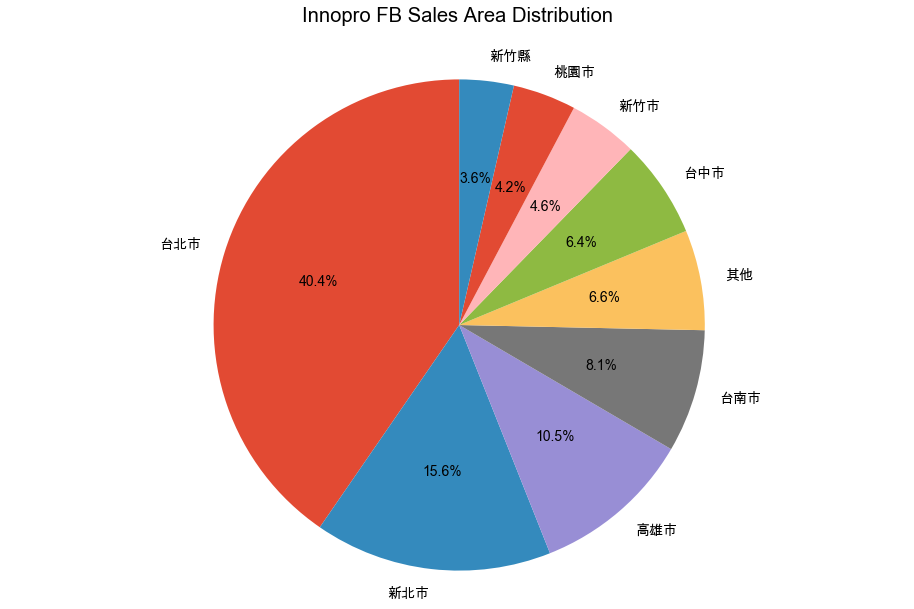

In [420]:
areaSum=df3.groupby(['city'])['sum'].sum()
areaSum=areaSum.sort_values(ascending=False)
areaSumUp8=areaSum.iloc[:8]#有500多萬沒地址
# areaSumUp8
other=pd.Series(areaSum.iloc[9:].sum(),index=['其他'])
areaSum=pd.concat([areaSumUp8,other])
areaSum=areaSum.sort_values(ascending=False)

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16,10)
plt.rcParams['font.family']=['Arial Unicode MS']
plt.rcParams['font.size']=14

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = areaSum.index
sizes = areaSum.values
# explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Innopro FB Sales Area Distribution')
ttl = ax1.title
ttl.set_position([.5, 1.05])
plt.show()

In [473]:
buyerlist=df3[df3['sum']>0]
buyerlist['pct_rank'] = buyerlist['sum'].rank(ascending=False,pct=True)
buyerlist1=buyerlist[buyerlist['pct_rank']<=0.01]['sum'].sum()
buyerlist10=buyerlist[(buyerlist['pct_rank']<=0.1)&(buyerlist['pct_rank']>0.01)]['sum'].sum()
buyerlist25=buyerlist[(buyerlist['pct_rank']<=0.25)&(buyerlist['pct_rank']>0.1)]['sum'].sum()
buyerlist50=buyerlist[(buyerlist['pct_rank']<=0.5)&(buyerlist['pct_rank']>0.25)]['sum'].sum()
buyerlist100=buyerlist[(buyerlist['pct_rank']<=1)&(buyerlist['pct_rank']>0.5)]['sum'].sum()


import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16,10)
plt.rcParams['font.family']=['Arial Unicode MS']
plt.rcParams['font.size']=14

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['pct0-1','pct1-10','pct10-25','pct25-50','pct50-100']
sizes = [buyerlist1,buyerlist10,buyerlist25,buyerlist50,buyerlist100]
# explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Innopro FB Sales VIP Distribution(PCT)')
ttl = ax1.title
ttl.set_position([.5, 1.05])
plt.show()

,Name,userprofile,helper,email,address,city,county,zipcode,shipname,tel,invoicetitle,sum,buyCount
FbId,,,,,,,,,,,,,
1524387869,李孝偉,https://www.facebook.com/profile.php?id=152438...,陳曉丰,eric0221.tw@yahoo.com.tw,信義路四段173號,台北市,大安區,106,李孝偉,0910152516,,1651107.0,38.0
100002427756153,Jeff Sung,https://www.facebook.com/jeff.sung.98,陳曉丰,jeffsung3118@gmail.com,水源地35-81號,嘉義市,嘉義市,600,宋思權,0988115066,,1627446.0,22.0
100000380702074,Paul Chan,https://www.facebook.com/paul.chan.1048,佩玄,pauljansfo@gmail.com,敦化南路二段77號3樓之4,台北市,大安區,106,詹其哲,0911900019,皇祿投資有限公司,1570657.0,23.0
100000200795140,Jason Lin,https://www.facebook.com/baybimmer,徐筱熙,dad@lucentlin.com,中華路四段451巷159號,新竹市,新竹市,300,林庭正,0975017833,,1399998.0,37.0
100000043841843,Michelle Liu,https://www.facebook.com/michelle.liu.9041,佩玄,m650508@yahoo.com.tw,平等路121-3號9樓,高雄市,三民區,849,劉眉秀,0919389251,,1382918.0,35.0
100000606890690,Jh Wang,https://www.facebook.com/jh.wang.92,佩玄,jhwang26@hotmail.com,北新路三段207-1號15樓,新北市,新店區,231,王建華,0910300920\t,,1375410.0,30.0
100000839834599,Chiu Manthus,https://www.facebook.com/chiu.manthus,佩玄,Ilung1130@gmail.com,衡陽路7號12樓,台北市,中正區,100,邱奕龍,0935548818,茂丞科技股份有限公司\t,1329842.0,27.0
563198546,Shih Chien Wong,https://www.facebook.com/shihchien.wong.9,陳曉丰,vaio33@hotmail.com,文化路88號,台南市,永康區,710,汪士千,0933297929,,1252608.0,35.0
100001472858771,王銘,https://www.facebook.com/profile.php?id=100001...,佩玄,wss0311@yahoo.com.tw,中山路2段412巷29弄8-3號15樓,新北市,板橋區,220,王勝賢,0932120174,合振昌紙器工業有限公司,1153013.0,36.0


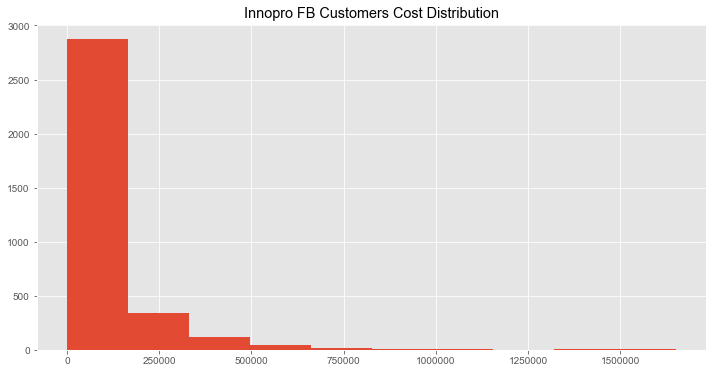

In [428]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)
plt.rcParams['font.family']=['Arial Unicode MS']
plt.rcParams['font.size']=14
plt.style.use("ggplot")
plt.title('Innopro FB Customers Cost Distribution')
df3['sum'].hist()

In [425]:
buyerlist.to_excel('/Users/benbilly3/Desktop/Innopro-master/InnoproSalesHistory(exclude_NoBuy).xlsx')

In [427]:
df3.to_excel('/Users/benbilly3/Desktop/Innopro-master/InnoproSalesHistory(exclude_Include).xlsx')

# 查理王

In [3]:
ct_df=pd.read_sql('select ordersn,textno,userid,name,amount,groupname from orderitems',con=engine,index_col=['textno'])
ct_df
# ct_df2=pd.read_sql('select wineno,textno,name,price from wineitems',con=engine,index_col=['wineno'])
# ct_wine=pd.read_excel('/Users/benbilly3/Desktop/Innopro-master/查李王酒款.xlsx')
# ct_wine=ct_wine.T.reset_index().T.iloc[:,0].astype(str)
# ct_df2=ct_df2.loc[ct_wine.values.tolist()]
# ct_df2=ct_df2.reset_index()
# ct_df2=ct_df2.set_index('textno')
# ct_df2=ct_df2[~ct_df2.index.duplicated()]
# ct_df3=ct_df2.index.tolist()
# #查理王會員
# ct_members=pd.read_sql('select * from CTGroupMembers',con=engine2,index_col=['fbuid'])
# ct_members=ct_members[~ct_members.index.duplicated()]#少數管理員重複(李王好德)

/anaconda3/lib/python3.6/site-packages/pymysql/cursors.py:170: Warning: (3719, "'utf8' is currently an alias for the character set UTF8MB3, but will be an alias for UTF8MB4 in a future release. Please consider using UTF8MB4 in order to be unambiguous.")
  result = self._query(query)


,ordersn,userid,name,amount,groupname
textno,,,,,
2105660879711707,D18051064,100000010293365,Thomas Chang,1,None
2105660879711707,D18051461,1468455083,Ming-Shiun Lin,1,None
2105654869712308,D1805227,567634140,Andre Yang,1,None
2105654869712308,D1805186,100010633397567,Huang Patrick,1,None
2105654869712308,D1805992,100003876790243,Hank Wu,1,None
2105654869712308,D18051064,100000010293365,Thomas Chang,1,None
2105654869712308,D1805260,100003388954303,Yao-Ting Wu,1,None
2105305789747216,D18051064,100000010293365,Thomas Chang,1,None
2105305789747216,D1805543,1019964639,Derrick Yang,1,None


In [822]:
#大清單抽出查理王酒款算總價
ct_df=ct_df.loc[ct_df3]
ct_df['wineno']=ct_df2['wineno']
ct_df['wineName']=ct_df2['name']
ct_df['price']=ct_df2['price']
ct_df['total']=ct_df['amount']*ct_df['price']
ct_df=ct_df[ct_df['total']>0]
ct_df=ct_df.set_index('userid')
ct_df['members']=ct_members['name']
ct_cus_buylist=ct_df.loc[:,['members','ordersn','wineName','amount','price','total']]
compare=ct_cus_buylist.groupby('userid')['total'].sum().sort_values().iloc[-100:]
# ct_cus_buylist.to_excel('/Users/benbilly3/Desktop/Innopro-master/客戶管理資訊/CTCustomerBuyListHistory.xlsx')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning:


Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike



In [823]:
#訂單加總
ct_df_sum=ct_df.groupby(['userid','ordersn'])['amount','total'].sum()
ct_df_sum

amount    total
userid          ordersn                   
                D19075476     1.0    950.0
100000000560262 D17122297     2.0   1030.0
                D1809280      1.0    640.0
100000003144751 D1809105      5.0   5030.0
100000004334758 D18061033     6.0   4560.0
100000008040781 D18061689     6.0   3940.0
                D18091689     2.0   1300.0
100000008067455 D170669      10.0   6320.0
                D170969       9.0   6690.0
                D1806592      4.0   2240.0
                D1808592      2.0   1180.0
                D1903592      6.0   3510.0
                D1904592      2.0   1400.0
                D1906592      3.0   2070.0
100000010159166 D190432       1.0    980.0
100000010293365 D18051064    42.0  53920.0
                D18071064     1.0   1350.0
100000010326257 D19055445     2.0   1640.0
                D19065445     8.0   6320.0
100000010366845 D18071372     5.0   2970.0
                D18091372     3.0   1780.0
                D19031372     5.0   3210.0
                D19041372     1.0    580.0
100000011305130 D19035399     3.0   3440.0
100000011626207 D17013233     2.0   2380.0
                D17123233     2.0   2100.0
                D1806538      2.0   1720.0
                D1807538      3.0   1690.0
100000013053274 D180846       6.0   4325.0
                D180946       4.0   4600.0
...                           ...      ...
813060320       D19031231     1.0   1290.0
813229534       D17022147     2.0   2280.0
                D17122147     1.0    870.0
816225570       D18061624     2.0   1320.0
816812079       D18061675     1.0    570.0
826699567       D18094436     9.0  13970.0
                D19044436     1.0   1980.0
833444268       D17072308     2.0   1190.0
                D17082308     3.0   2570.0
                D17092308     1.0    790.0
835618747       D19034425     1.0    970.0
837580426       D1809154     10.0   6060.0
843153773       D1806658      1.0    860.0
                D1807658      6.0   5940.0
                D1808658      1.0    650.0
                D1809658      1.0    470.0
                D1903658      6.0   3580.0
849484221       D18061525     2.0   1360.0
                D18081525     2.0   1740.0
                D18101525     1.0    550.0
                D18111525     2.0   1380.0
                D18121525     1.0    720.0
                D19041525     1.0    790.0
890605170       D18061594     3.0   2210.0
902135320       D1806385      5.0   3090.0
                D1807385      4.0   2780.0
                D1808385      1.0    940.0
                D1810385      3.0   1660.0
                D1811385      1.0    660.0
                D1812385      4.0   4290.0

[5661 rows x 2 columns]

In [825]:
#增加統計欄位
ct_members['sum']=ct_df_sum.groupby('userid')['total'].sum()
ct_members['bottleSum']=ct_df_sum.groupby('userid')['amount'].sum()
ct_members['buyCount']=ct_df_sum.groupby('userid')['total'].count()
ct_members['avg/bolltle']=round(ct_members['sum']/ct_members['bottleSum'])
ct_members

,index,fburl,joinDate,name,sum,bottleSum,buyCount,avg/bolltle
fbuid,,,,,,,,
103113957736836,0,https://www.facebook.com/VDPTaiwan/?ref=gm&__t...,2018-11-13,李王好德,NaN,NaN,NaN,NaN
100006927070596,1,https://www.facebook.com/profile.php?id=100006...,2019-09-03,李榮家,NaN,NaN,NaN,NaN
790385240,3,https://www.facebook.com/andy.chang.9210256?sk...,2019-08-25,張博超,NaN,NaN,NaN,NaN
100002995154240,4,https://www.facebook.com/profile.php?id=100002...,2019-08-23,麻糬,NaN,NaN,NaN,NaN
100000380702074,5,https://www.facebook.com/paul.chan.1048?sk=wal...,2019-08-19,Paul Chan,3390.0,3.0,1.0,1130.0
100001531673526,6,https://www.facebook.com/lorashi?sk=wall&fref=...,2019-08-18,Chen-yu Shi,NaN,NaN,NaN,NaN
1614773199,7,https://www.facebook.com/demonangele?sk=wall&f...,2019-08-18,May Wang,NaN,NaN,NaN,NaN
567262117,8,https://www.facebook.com/alantai919?sk=wall&fr...,2019-06-11,Alan Tai,NaN,NaN,NaN,NaN
1089597305,9,https://www.facebook.com/profile.php?id=108959...,2019-08-17,楊安宜,NaN,NaN,NaN,NaN


In [826]:
ct_lastBuy=ct_df_sum
ct_lastBuy=ct_lastBuy.sort_index()
ct_lastBuy=ct_lastBuy.reset_index()
ct_lastBuy=ct_lastBuy.set_index('userid')
ct_lastBuy=ct_lastBuy[~ct_lastBuy.index.duplicated(keep='last')]
ct_lastBuy=ct_lastBuy.reset_index()
ct_lastBuy['ordersn']=ct_lastBuy['ordersn'].apply(lambda s:s[1:5])
ct_lastBuy=ct_lastBuy.set_index('userid')
ct_lastBuy

,ordersn,amount,total
userid,,,
,1907,1.0,950.0
100000000560262,1809,1.0,640.0
100000003144751,1809,5.0,5030.0
100000004334758,1806,6.0,4560.0
100000008040781,1809,2.0,1300.0
100000008067455,1906,3.0,2070.0
100000010159166,1904,1.0,980.0
100000010293365,1807,1.0,1350.0
100000010326257,1906,8.0,6320.0


In [828]:
ct_members['lastBuyDate']=ct_lastBuy['ordersn']
ct_members['lastBuyDate']=ct_members['lastBuyDate'].apply(lambda s:dateProcess(s))
ct_members['joinPeriod(Month)']=(datetime.now()-ct_members['joinDate']).apply(lambda s:round((s.days)/30,0) if s!=None else None)
ct_members['noBuyPeriod']=(datetime.now()-ct_members['lastBuyDate']).apply(lambda s:round((s.days)/30,0) if s!=None else None).fillna(999)
ct_members['class']=['B6' if (12>a>=6)&(b>=6) else 'B12' if (a>=12)&(b>=12) else 'Good' for a,b in zip(ct_members['joinPeriod(Month)'],ct_members['noBuyPeriod'])]
ct_members[ct_members['class']=='B24']
ct_members=ct_members.sort_values('sum',ascending=False)
ct_members.to_excel('/Users/benbilly3/Desktop/Innopro-master/客戶管理資訊/CTCustomerClass.xlsx')
ct_members=ct_members.reset_index()
ct_members.to_sql(name='CTClass', con=engine2, if_exists='replace')
ct_members

,fbuid,index,fburl,joinDate,name,sum,bottleSum,buyCount,avg/bolltle,lastBuyDate,joinPeriod(Month),noBuyPeriod,class
0,100001959157859,2094,https://www.facebook.com/leehungtze?fref=gm&__...,2018-10-14,李宏澤,319390.0,238.0,21.0,1342.0,2019-07-25,11.0,2.0,Good
1,100000281327684,2456,https://www.facebook.com/jason.ho.7737?fref=gm...,2018-10-14,Jason Ho,272915.0,252.0,26.0,1083.0,2019-07-25,11.0,2.0,Good
2,100001763721407,2046,https://www.facebook.com/chichih.hung?fref=gm&...,2018-10-14,Chi-Chih Hung,259505.0,185.0,14.0,1403.0,2019-07-25,11.0,2.0,Good
3,688948130,2271,https://www.facebook.com/pava.lu.5?fref=gm&__t...,2018-10-14,Pava Lu,247205.0,181.0,16.0,1366.0,2019-07-25,11.0,2.0,Good
4,100000403492915,2305,https://www.facebook.com/chialin.teng?fref=gm&...,2018-10-14,ChiaLin Teng,216480.0,209.0,28.0,1036.0,2019-07-25,11.0,2.0,Good
5,100000043841843,2234,https://www.facebook.com/michelle.liu.9041?fre...,2018-10-14,Michelle Liu,199160.0,115.0,19.0,1732.0,2019-07-25,11.0,2.0,Good
6,614496308,2156,https://www.facebook.com/pharaoh.lim.7?fref=gm...,2018-10-14,Pharaoh Lim,155530.0,99.0,18.0,1571.0,2019-07-25,11.0,2.0,Good
7,100013251333743,2503,https://www.facebook.com/profile.php?id=100013...,2018-09-09,查李王,142120.0,123.0,15.0,1155.0,2019-07-25,12.0,2.0,Good
8,100001472858771,1495,https://www.facebook.com/profile.php?id=100001...,2018-10-14,王銘,136160.0,103.0,14.0,1322.0,2019-07-25,11.0,2.0,Good
9,1805622425,2004,https://www.facebook.com/profile.php?id=180562...,2018-10-14,邱禹誠,120970.0,118.0,24.0,1025.0,2019-07-25,11.0,2.0,Good


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



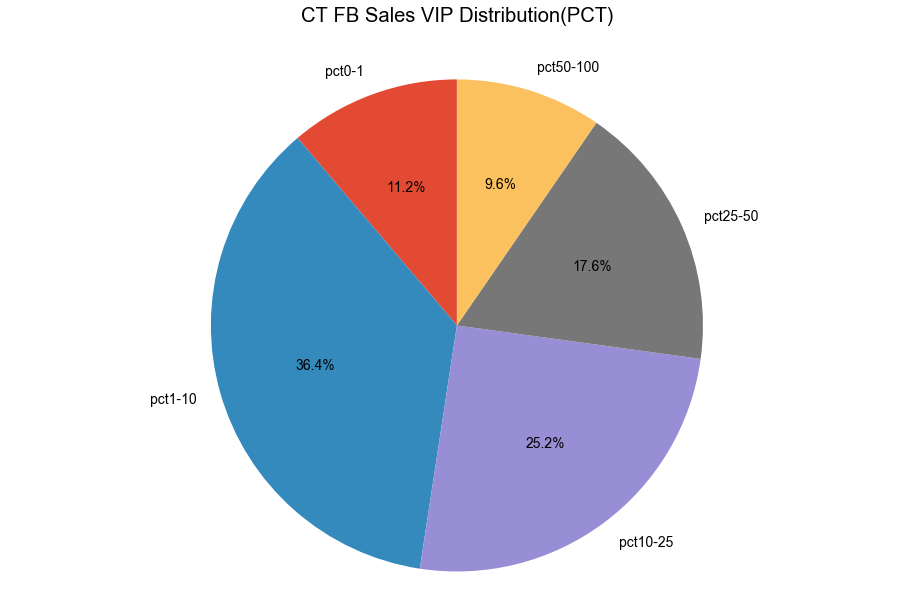

In [813]:
buyerlist=ct_members[ct_members['sum']>0]
buyerlist['pct_rank'] = buyerlist['sum'].rank(ascending=False,pct=True)
buyerlist1=buyerlist[buyerlist['pct_rank']<=0.01]['sum'].sum()
buyerlist10=buyerlist[(buyerlist['pct_rank']<=0.1)&(buyerlist['pct_rank']>0.01)]['sum'].sum()
buyerlist25=buyerlist[(buyerlist['pct_rank']<=0.25)&(buyerlist['pct_rank']>0.1)]['sum'].sum()
buyerlist50=buyerlist[(buyerlist['pct_rank']<=0.5)&(buyerlist['pct_rank']>0.25)]['sum'].sum()
buyerlist100=buyerlist[(buyerlist['pct_rank']<=1)&(buyerlist['pct_rank']>0.5)]['sum'].sum()


import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16,10)
plt.rcParams['font.family']=['Arial Unicode MS']
plt.rcParams['font.size']=14

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['pct0-1','pct1-10','pct10-25','pct25-50','pct50-100']
sizes = [buyerlist1,buyerlist10,buyerlist25,buyerlist50,buyerlist100]
# explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('CT FB Sales VIP Distribution(PCT)')
ttl = ax1.title
ttl.set_position([.5, 1.05])
plt.show()

In [806]:
#查漏網大魚
d=[]
# for i in ct_members.index:
for j in compare.index:
    if j not in ct_members.index:
        d.append(j)
d

['100001013239357']

In [807]:
compare.loc['100001013239357']

108290.0